## Assignment 3 - Dimensionality Reduction

This assignment is based on content discussed in module 6 and will work with the famous MNIST dataset, which is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.
The dataset has been provided to you in a .csv file.

## Learning outcomes

- Apply a Random Forest classification algorithm to MNIST dataset
- Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
- Apply dimensionality reduction techniques: t-SNE and LLE

## Questions (15 points total)

__Question 1 (1 point).__ Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [27]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)
random_state = 123

import time


# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline #each pipeline can have multiple steps
from sklearn.compose import ColumnTransformer #for selecting specific columns and transforming them with individual pipelines
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler #specific transformations we want to use in our pipelines
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, ConfusionMatrixDisplay, precision_recall_curve, pairwise_distances
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
pathToFile = r"C:\\Users\\jverc\\Downloads\\"
#pathToFile = r"C:\\Users\\jverc\\Downloads\\"

fileName = 'mnist_dataset.csv'

df = pd.read_csv(pathToFile+fileName, index_col=0)

df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Clean Copy
df_discovery = df.copy()
df_discovery.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 69999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 419.8 MB


In [4]:
df_discovery.shape


(70000, 785)

In [5]:
print(df_discovery.isnull().sum().sum(), " missing values in the dataset.")

0  missing values in the dataset.


In [6]:
df_discovery.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,4.452429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,2.890195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
X = df.drop(columns=['label']).values / 255.0  # Normalize pixel values to [0,1]
y = df['label'] # Target variable

In [8]:
feat_cols = ['pixel' + str(i) for i in range(X.shape[1])]

In [9]:
mnist_df = pd.DataFrame(X, columns=feat_cols)
mnist_df['label'] = y.values

<Figure size 640x480 with 0 Axes>

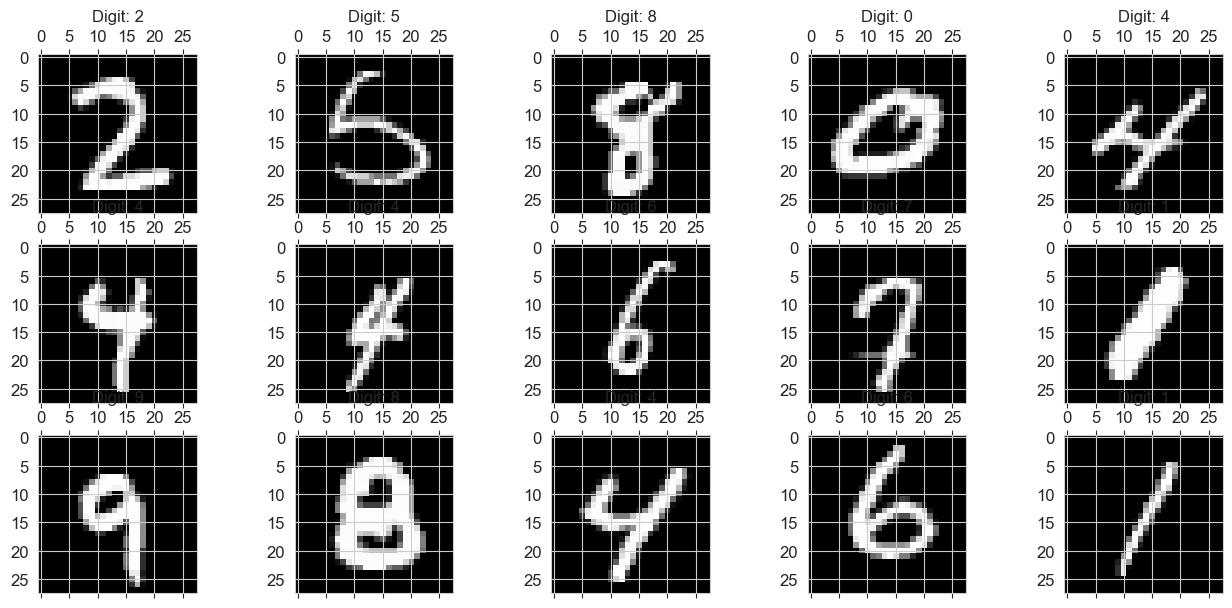

In [10]:
# Generate 30 plots of randomly selected images

plt.gray()

fig= plt.figure(figsize=(16,7))

for i in range(0, 15):
    ax = fig.add_subplot(3,5, i+1, title="Digit: {}".format(str(mnist_df.loc[i, 'label'])))
    
    ax.matshow(mnist_df.loc[i, feat_cols].values.reshape((28,28)).astype(float))

plt.show()

In [11]:
X_train, X_test = X[:60_000], X[60_000:]
y_train, y_test = y[:60_000], y[60_000:]
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (60000, 784)
X_test.shape: (10000, 784)
y_train.shape: (60000,)
y_test.shape: (10000,)


__Question 2 (2 points).__ Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

Not needed GridSearchCV for hyperparamater tuning but good to keep for next time. 300 was the optimal n_estimators

In [12]:
# # Define parameter grid
# rf_param_grid = {
#     "n_estimators": [10, 50, 100, 200, 300]
# }


# # Perform Grid Search
# rf_grid_search = GridSearchCV(
#     RandomForestClassifier(random_state=random_state),
#     rf_param_grid,
#     scoring="accuracy", # multi-class
#     cv=StratifiedKFold(n_splits=3),  # 3-fold Cross Validation
#     n_jobs=-1,
#     verbose=2
# )
# rf_grid_search.fit(X_train, y_train)

# # Best hyperparameter
# best_rf_n= rf_grid_search.best_params_["n_estimators"]
# print(f"Random Forest best params: {best_rf_n}")

In [ ]:
# Train the best model on full training set
random_forest_model = RandomForestClassifier(n_estimators=300, random_state=random_state, n_jobs=-1)

# Train the model and time it
start_time = time.time()
random_forest_model.fit(X_train, y_train)
training_time = time.time() - start_time

y_pred = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)


print(f"\nTraining Time: {training_time:.2f} seconds")
print(f"Test Accuracy: {accuracy:.4f}")


Training Time: 7.16 seconds
Test Accuracy: 0.9708


__Question 3 (4 points).__ Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [14]:
from sklearn.decomposition import PCA

pca_full = PCA()
pca_full.fit(X_train)  

cumsum_img = np.cumsum(pca_full.explained_variance_ratio_)
num_components_95 = np.argmax(cumsum_img >= 0.95) + 1

print(f"The number of dimensions required to preserve 95% of MNIST variance is: {num_components_95}")


The number of dimensions required to preserve 95% of MNIST variance is: 154


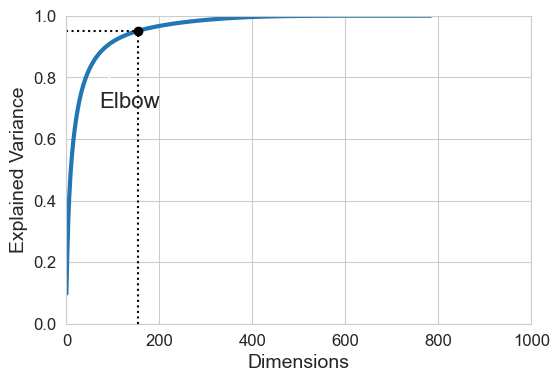

In [15]:
plt.figure(figsize=(6,4))
plt.plot(cumsum_img, linewidth=3)
plt.axis([0, 1000, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([num_components_95, num_components_95], [0, 0.95], "k:")
plt.plot([0, num_components_95], [0.95, 0.95], "k:")
plt.plot(num_components_95, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()

In [16]:
# Reduce the dimensionality of the dataset to 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Check the reduced shape
print(f"Original X_train shape: {X_train.shape}")
print(f"Reduced X_train shape: {X_train_pca.shape}")
print(f"Number of components selected: {pca.n_components_}")

Original X_train shape: (60000, 784)
Reduced X_train shape: (60000, 154)
Number of components selected: 154


In [ ]:
# Train a Random Forest classifier on the PCA-transformed dataset
rf_pca = RandomForestClassifier(n_estimators=300, random_state=random_state, n_jobs=-1)

# Train the model and time it
start_time_pca = time.time()
rf_pca.fit(X_train_pca, y_train)
training_time_pca = time.time() - start_time_pca


y_pred_pca = rf_pca.predict(X_test_pca)


accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"\nTraining Time (with PCA): {training_time_pca:.2f} seconds")
print(f"Test Accuracy (with PCA): {accuracy_pca:.4f}")
print(f"Reduction in features: {X_train.shape[1]} → {X_train_pca.shape[1]}")


Training Time (with PCA): 20.52 seconds
Test Accuracy (with PCA): 0.9537
Reduction in features: 784 → 154


__Question 4 (4 points).__ Use t-SNE to reduce the MNIST dataset, show result graphically.

In [ ]:
from sklearn.manifold import TSNE
# Use PCA-reduced dataset 
X_pca_subset = X_train_pca[:10_000]
y_subset = y_train[:10_000]

# Apply t-SNE (n_components=2 for visualization)
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=random_state)

tsne_result = tsne.fit_transform(X_pca_subset)

print(f't-SNE done! Time elapsed: {time.time()-time_start:.2f} seconds')

c:\Users\jverc\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 0.309s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.083714
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.696114
[t-SNE] KL divergence after 300 iterations: 2.787882
t-SNE done! Time elapsed:

<Figure size 1600x1000 with 0 Axes>

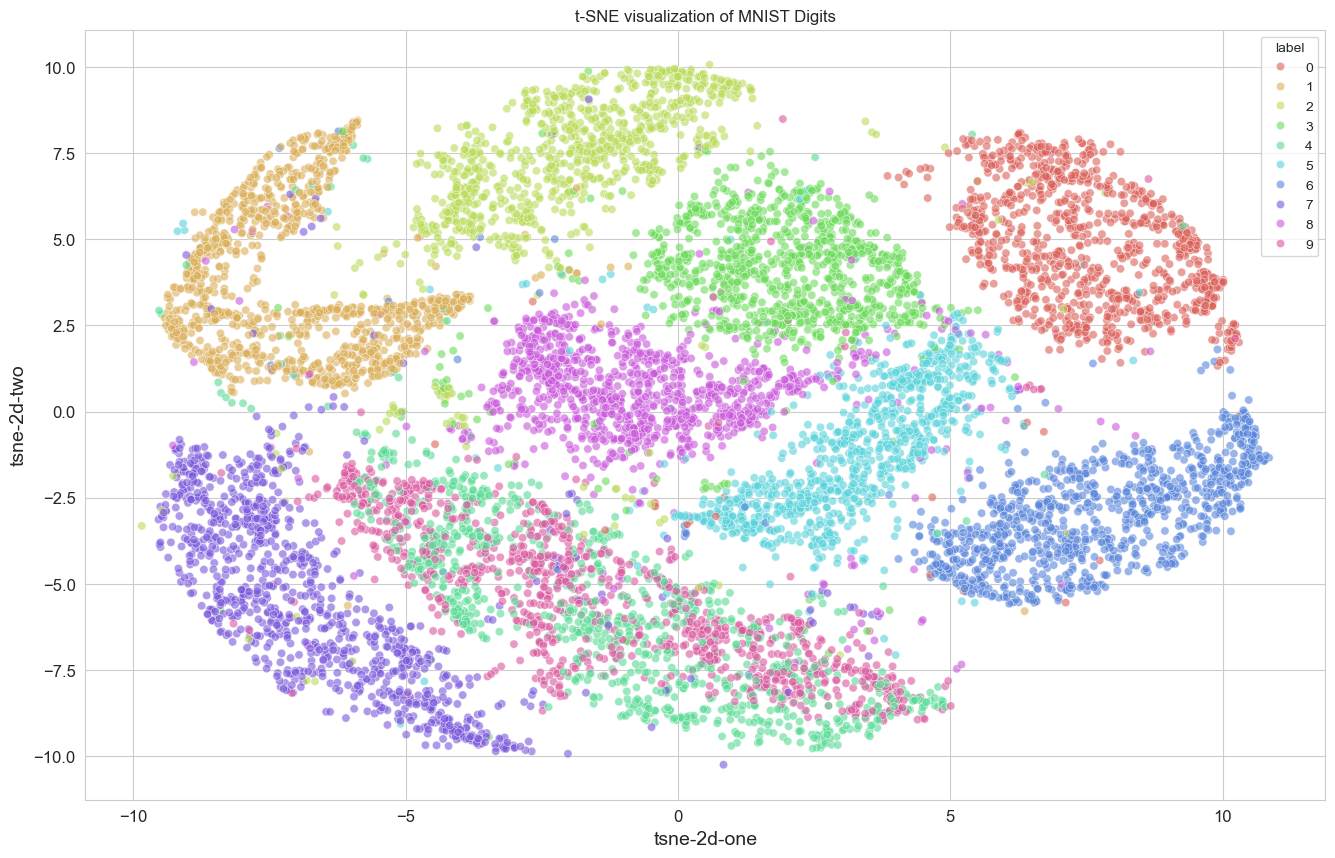

In [22]:
tsne_df = pd.DataFrame()

# Add the t-SNE components to DataFrame for visualization
tsne_df ['tsne-2d-one'] = tsne_result[:, 0]
tsne_df ['tsne-2d-two'] = tsne_result[:, 1]
tsne_df['label'] = y_subset.values

# Plot the result
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two', hue=tsne_df ['label'],
    palette=sns.color_palette("hls", 10),
    alpha=0.6, data=tsne_df  
)
plt.title("t-SNE visualization of MNIST Digits")
plt.show()

__Question 5 (4 points).__ Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) or _Multidimensional scaling_ (MDS).

LLE done! Time elapsed: 18.65 seconds


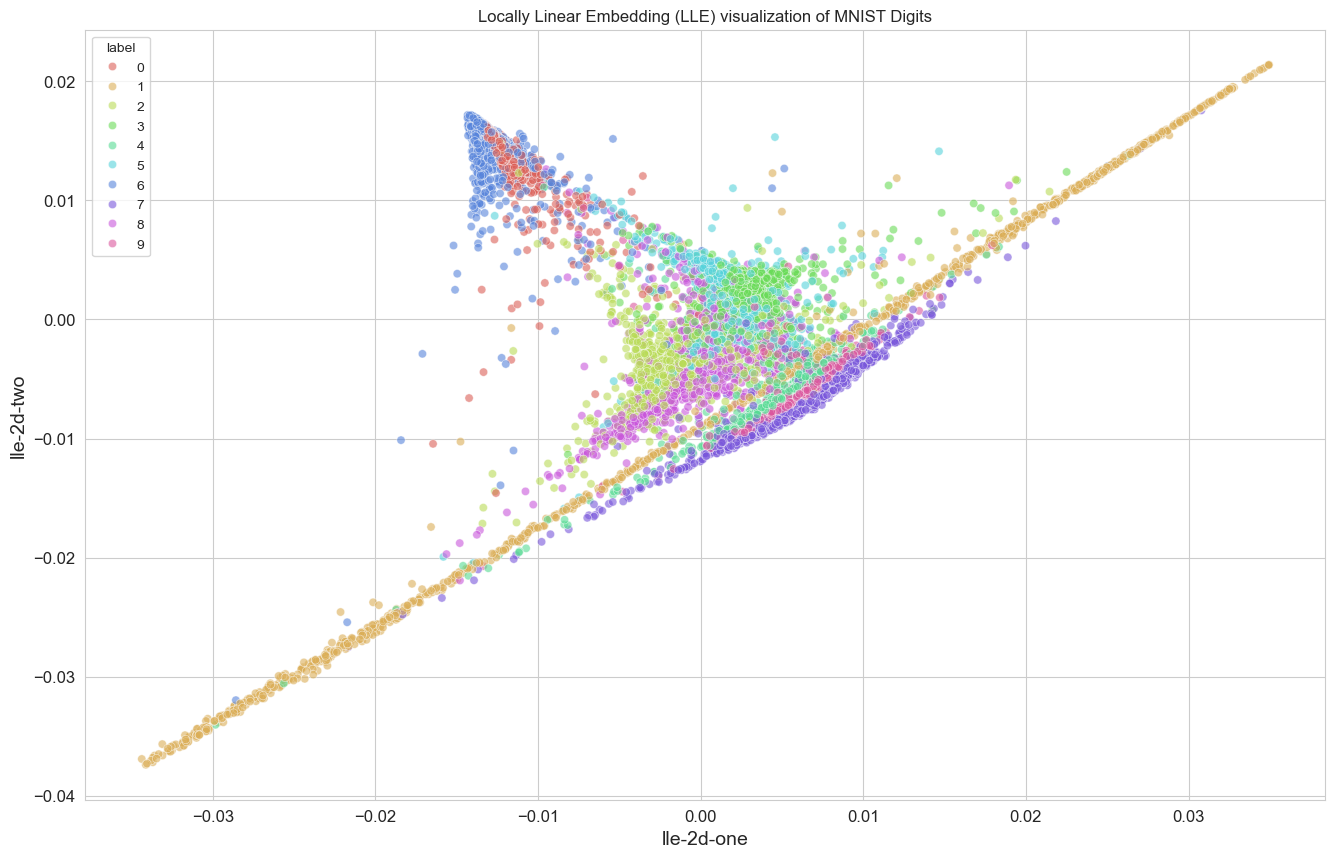

In [25]:
from sklearn.manifold import LocallyLinearEmbedding

# Reduce the dataset using LLE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=random_state)

time_start = time.time()
X_lle = lle.fit_transform(X_train_pca[:10_000])  # Use only 10,000 samples to speed up computation
print(f'LLE done! Time elapsed: {time.time() - time_start:.2f} seconds')


lle_df = pd.DataFrame(X_lle, columns=['lle-2d-one', 'lle-2d-two'])
lle_df['label'] = y_train[:10_000].values


plt.figure(figsize=(16,10))
sns.scatterplot(
    x='lle-2d-one', y='lle-2d-two', hue=lle_df['label'],
    palette=sns.color_palette("hls", 10), alpha=0.6, data=lle_df
)
plt.title("Locally Linear Embedding (LLE) visualization of MNIST Digits")
plt.show()

c:\Users\jverc\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:626: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


MDS done! Time elapsed: 27.59 seconds


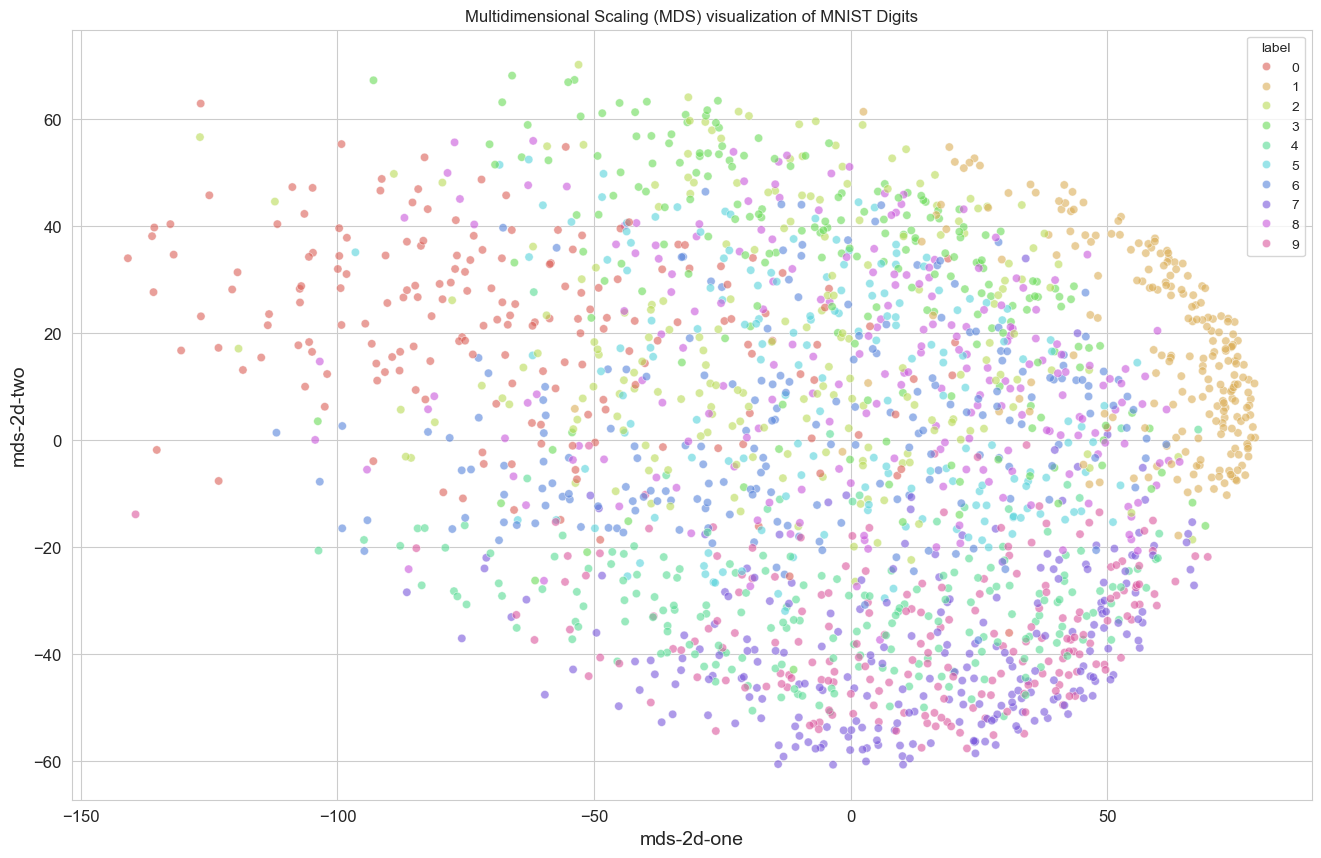

In [29]:
from sklearn.manifold import MDS

# Use PCA-reduced dataset
X_mds_subset = X_train_pca[:2000]
y_mds_subset = y_train[:2000]

distance_matrix = pairwise_distances(X_mds_subset, metric='euclidean')

# Reduce dataset using MDS
mds = MDS(n_components=2, random_state=random_state, n_jobs=-1)

time_start = time.time()
X_mds = mds.fit_transform(distance_matrix)  
print(f'MDS done! Time elapsed: {time.time() - time_start:.2f} seconds')


mds_df = pd.DataFrame(X_mds, columns=['mds-2d-one', 'mds-2d-two'])
mds_df['label'] = y_train[:2000].values


plt.figure(figsize=(16,10))
sns.scatterplot(
    x='mds-2d-one', y='mds-2d-two', hue=mds_df['label'],
    palette=sns.color_palette("hls", 10), alpha=0.6, data=mds_df
)
plt.title("Multidimensional Scaling (MDS) visualization of MNIST Digits")
plt.show()
